# Computer Vision - P3

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments need to be in **english**.

- The deliverable must be a file named **P3_Student1_Student2.zip** that includes:
    - The notebook P3_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 30th, 23:00 h** 

==============================================================================================
## Practicum 3: Image and Video Segmentation

==============================================================================================

The main topics are:

1)	Segmentation of video shots with static scenes.

2) Background substraction.

3)	Segmentation of images.

In order to successfuly complete this practicum it is necessary to understand the following theory concepts: background substraction, K-means clustering, etc.

The following chapters of the book “Computer Vision: Algorithms and Applicatons” from Richard Szeliski have further information about the topic:

* Chapter 4: Computer Vision: Algorithms and Applications.

* Chapter 5: Segmentation.

## 3.1 Background substraction methods


Given the video stored in ‘Barcelona-sequence’, which contains images acquired by a static camera, remove all the "artifacts" considered as foreground related to movement extracting the background images.

Note: One of the applications of these methods is the button "remove tourists" implemented in most commercial photo cameras. For instance, Adobe uses the "Monument Mode", which automatically deletes the people going by the cameras.

Read and visualize the sequence of images "images/Barcelona-sequence"
Hint: In order to read a  collection of images, we wil use the function animation.FuncAnimation [https://matplotlib.org/2.0.0/api/_as_gen/matplotlib.animation.FuncAnimation.html].

Observe in the following example, how FuncAnimation is used to read and visualize a sequence of frames. Explore the parameters of animation.FuncAnimation().

<IPython.core.display.Javascript object>


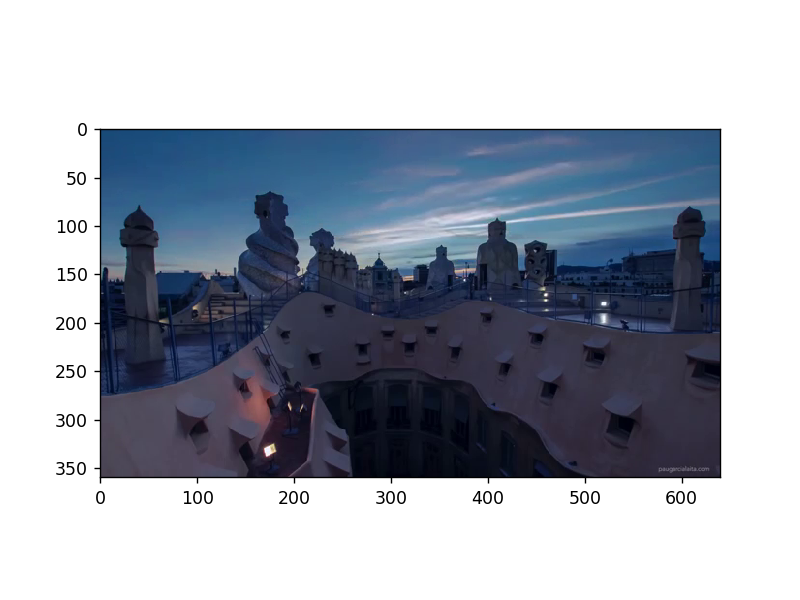

In [2]:
import numpy as np
import skimage
from skimage import io
import matplotlib.pyplot as plt
from skimage import img_as_float, color , exposure

ic = io.ImageCollection('images/Barcelona-sequence/*.png')
        # Reading a sequence of images from a folder

import matplotlib.animation as animation
%matplotlib nbagg 
    #Changing the pluggin is necessary always when visualizing a video!

    
c = 0
i=0      #Inicializing the video display
fig = plt.figure()  # Create figure
im = plt.imshow(ic[i], animated=True) #Visualize the first image

def updatefig1(i):   #Updating the frame visualization
    #c+=1
    #print (c)
    im.set_array(ic[i*5]) #Changing the content of the canvas
    return im, #to return a tuple!

ani = animation.FuncAnimation(fig, updatefig1, interval=5, blit=False, frames=50, repeat= False)


(2 points) a) Find where a shot (scene) finishes and the following starts (boundaries). Each of the scenes in a video is usually called 'shot'. 

To solve this exercise, you need to create a **temporal plot** showing a frame by frame measure to be defined by you, being applicable to distinguish the shots. 

Execute the following code in "Example A". This created **temporal plot** should replace the temporal plot given as a template. 


**Hint:**
- If you need to convert the image to float, the command is: img_as_float()

- If you need the histogram, it is in skimage.exposure


In [3]:
def values_histogram_RGB(image):
    
    image = img_as_float(image)
    y1_r = np.asarray(exposure.histogram(image[:,:,0],nbins=8))[0]
    y1_g = np.asarray(exposure.histogram(image[:,:,1],nbins=8))[0]
    y1_b = np.asarray(exposure.histogram(image[:,:,2],nbins=8))[0]
    
    return np.asarray([y1_r,y1_g,y1_b])

<IPython.core.display.Javascript object>


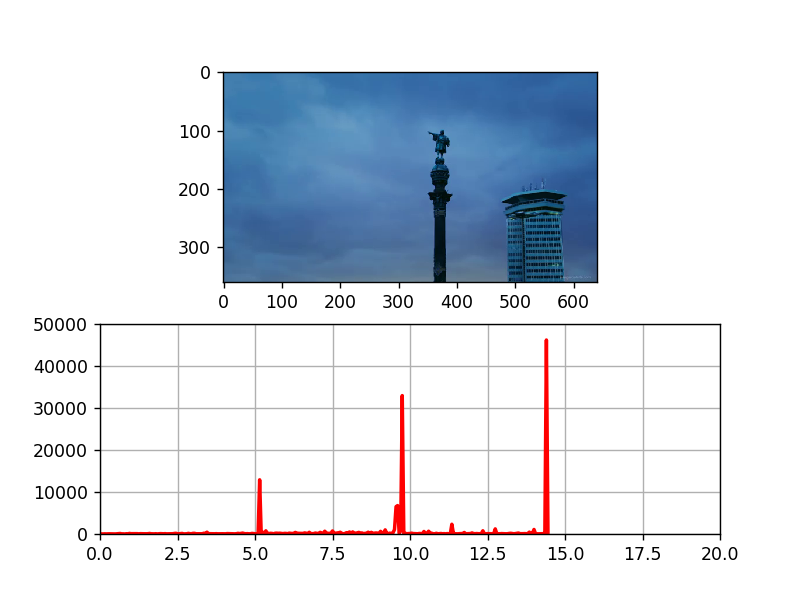

In [4]:
# Example A
# Sinusoidal plot points generation

g = [0]
def data_gen():
    t = data_gen.t
    #g = []
    cnt = 0
    y_prev = 0
    while cnt < 1000:
        image = ic[cnt+1]
        values_next_image = values_histogram_RGB(image)
        
        image1 = ic[cnt]
        values_actual_image = values_histogram_RGB(image1)
        
        values = np.abs(values_next_image - values_actual_image)
        
        y = np.mean(values)
        if y > 10000:
            g.append(cnt)
            g.append(cnt+1)            
        cnt+=1
        t += 0.05
        y_prev = y
        
        # adapted the data generator to yield both sin and cos
        yield t, y

data_gen.t = 0

%matplotlib nbagg

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2,1)

# intialize a line object on the second axes for plotting
line, = ax2.plot([], [], lw=2, color='r')

ax2.set_ylim(0, 50000)
ax2.set_xlim(0, 20)
ax2.grid()

# initialize the data arrays 
xdata, ydata = [], []
def run(data):
    # update the data plot
    t, y = data
    xdata.append(t) # time = x axis
    ydata.append(y) # y axis

    # Plot image on top row
    ax1.imshow(ic[len(xdata)])
          
    # Plot sin in bottom row
    xmin, xmax = ax2.get_xlim()
    if t >= xmax:
        ax2.set_xlim(xmin, 2*xmax)
        ax2.figure.canvas.draw()
            
    # update the data of both line objects
    line.set_data(xdata, ydata)

    return line

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=1, repeat=False)
plt.show()

(0.5 points) b) Show the initial and final images of each shot extracted as follows:

<img src="images_for_notebook/result_shot_detection.png">


In [27]:
print (len(g)//2)

7


<IPython.core.display.Javascript object>


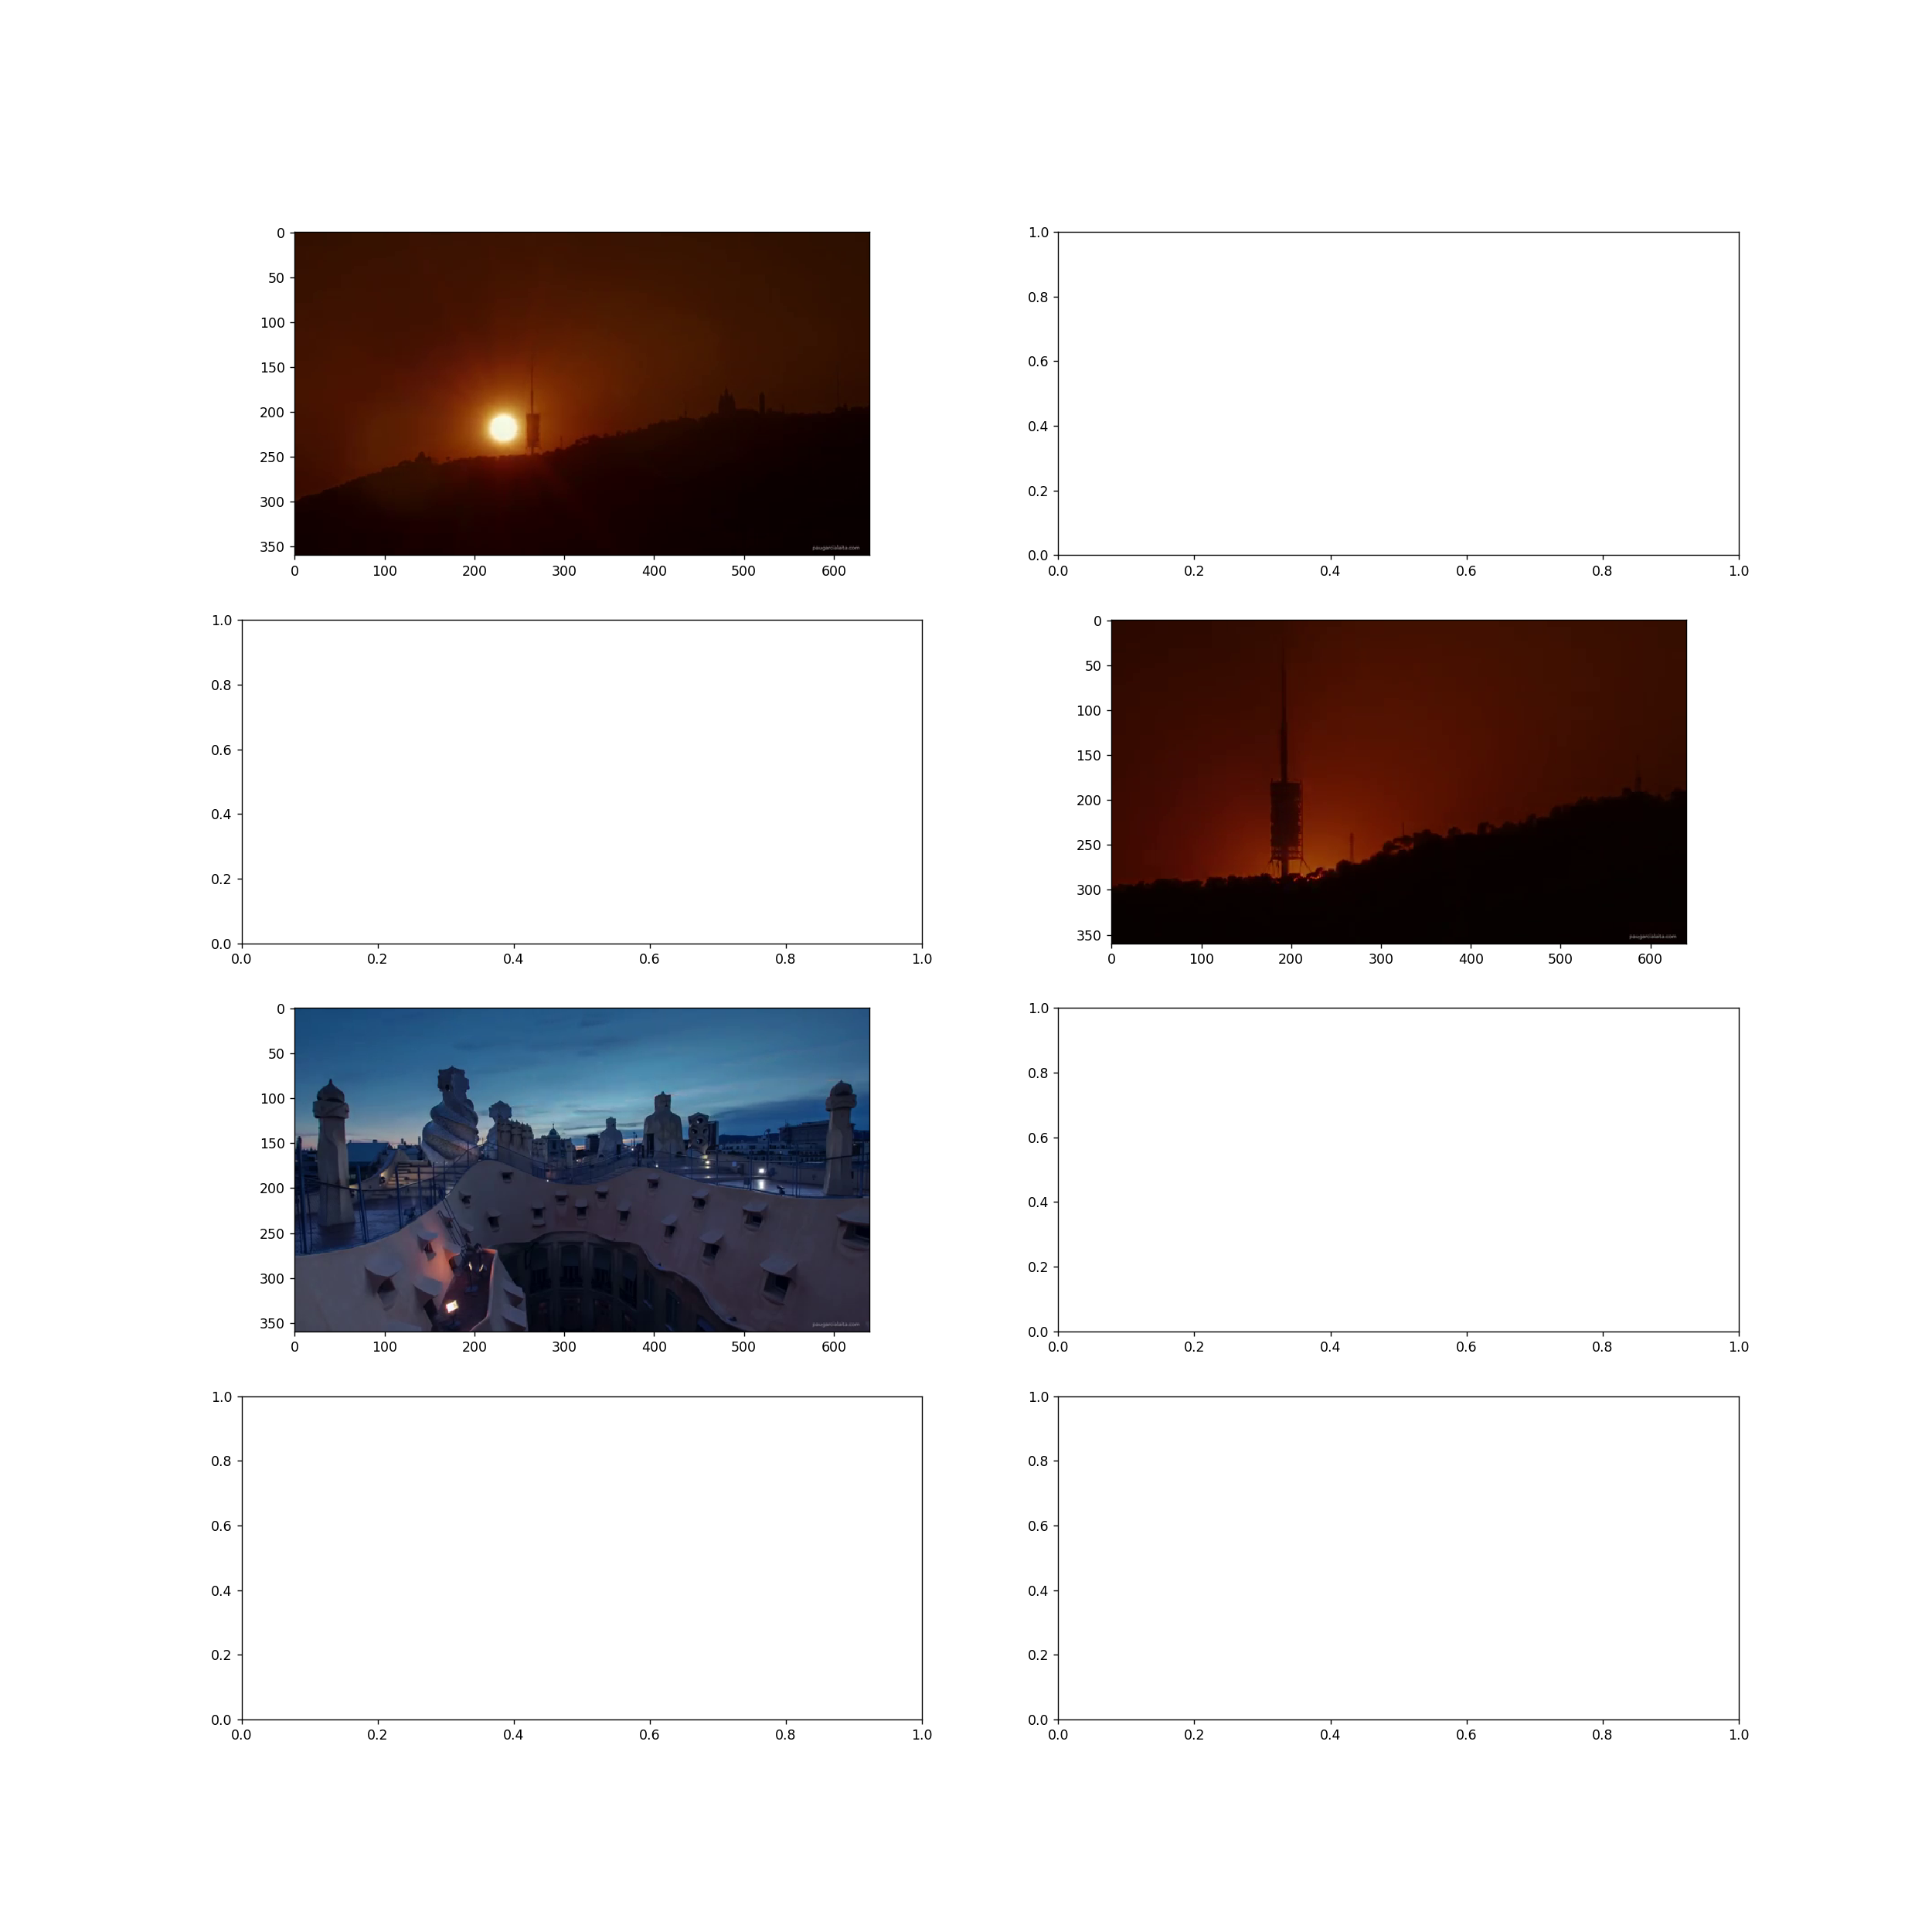

3


In [34]:
"""for i in g:
    fig = plt.figure()
    im = plt.imshow(ic[i],animated = True)
    plt.show()"""

#print
#f, axarr = plt.subplots(ncols=len(g)//2, nrows=len(g)+1//2,figsize=(20,20))

#plt.show()

"""for i in range():
    axarr[i].imshow(np.asarray(ic[g[i]]), cmap='gray')"""
    
#plt.show()


f, axarr = plt.subplots(ncols=2, nrows=4,figsize=(20,20))

#axarr[index][0].imshow(np.asarray(ic[g[index]]), cmap='gray')
print (len(g)//2)
for index in range(0,(len(g)-1)):
    if len(g) % 2 != 0 and index//2 == (len(g)-1):
        axarr[index//2][0].imshow(np.asarray(ic[g[index]]), cmap='gray')
        continue
    if index//2 % 2 == 0:
        axarr[index//2][0].imshow(np.asarray(ic[g[index]]), cmap='gray')
    else:
        axarr[index//2][1].imshow(np.asarray(ic[g[index]]), cmap='gray')
    #
    #
plt.show()

(0.5 points) c) Which measure have you used in order to visually distinguish the shots in a plot? Explain your solution.

- In order to solve this problem, we've detected in the plot that when a change of shot occurs, the y-value that represents the difference between the actual image and the previous one shot up above 10.000. So we put as threshold the value 10.000 to know when a shot finishes.

## 3.2 Background substraction

(2) a) Apply the background substraction algorithm (check theory material).

Visualize, for each different scene (there are 3) of the video:

    1) images belonging to the shot
    2) the background image, and
    3) the foreground.
    
**Hint**: You can construct a mask obtained from the original image and the background in order to know which parts of the image form part from the foreground and recover from the original image just the foreground regions.

In [ ]:
def all_backgrounds():
    half = len(g)
    backgrounds = []
    for a in range(0,half-1,2):
        all_pictures=[]
        for i in range(g[a],g[a+1]):
            all_pictures.append(ic[i])

        background = np.median(all_pictures,axis=0)
        background = np.asarray(background,dtype=np.uint8)
        backgrounds.append(background)
    return backgrounds

In [ ]:
#[0, 102, 103, 194, 195, 287, 288]

def show_backgrounds():
    
    f, axarr = plt.subplots(nrows=3,figsize=(10,10))
    backgrounds = all_backgrounds()
    for index in range(len(backgrounds)):
        axarr[index].imshow(backgrounds[index], cmap='gray')
    plt.show()

In [ ]:
show_backgrounds()

In [ ]:
def convert_to_gray():
    half = len(g)
    backgrounds = all_backgrounds()
    grey_backgrounds = []
    grey_original_starts = []
    position_at_image = []
    for picture in backgrounds:
        grey_backgrounds.append(color.rgb2gray(picture))
        
    for index in range(0,half-1,2):
        #print(g[index])
        grey_original_starts.append(color.rgb2gray(ic[g[index]]))  
        position_at_image.append(g[index])
        
        
    return [grey_backgrounds,grey_original_starts,position_at_image]


In [ ]:
def show_foreground():
    half = len(g)
    index = 0
    grey_backgrounds, grey_original_starts, values = convert_to_gray()
    grey_backgrounds = np.asarray(grey_backgrounds)
    grey_original_starts = np.asarray(grey_original_starts)    
    
    f, axarr = plt.subplots(nrows=3,figsize=(10,10))
    for index in range(len(grey_backgrounds)):
        axarr[index].imshow(np.abs(grey_backgrounds[index]-grey_original_starts[index]), cmap='gray')
        axarr[index].set_title(str(values[index]))

    plt.show()

In [ ]:
show_foreground()

(0.2 points) - What happens if the shots are not correctly extracted? 



- If we don't extract ths shots corretly, we wouldn't be able to substract the background from a shot. If we can't substract the background we wouldn't be able to substract the foreground

(0.2 points) - What happens if you find too many shots in the video? 

- Maybe we wouldn't be able to extract all of the shots or we would fail to extract some shots because the value we are using to detect a change of shot wouldn't be big enough (or small enough)

(0.3 points) - What do the static background images represent? 

- The static background represents the pixels that do not chage over time.

(0.2 points) - In which situations does the algorithm work and in which it does not? 


- The algorithm works better when we have many images, otherwise it's possible we can't extract the background correctly. Also the background needs to be static, if the camera moves a lot while recording it may be very possible that the background extraction fails.

(0.2 points) - What happens if you substract the background image from the original one?

- If we remove the background from the original image we've got the foreground (the dynamic part)

(0.2 points) - Do you see any additional application for this algorithm?

- This algorithm could be useful to surveillance, traffic monitoring or optical motion capture

(0.5) **[OPTIONAL]**
Apply the algorithm to some other static video that you found.

## 3.3 Clustering methods on the RGB-XY space

**Hint**: 
- Different image segmentation commands can be found in skimage.segmentation.
- Use the function segmentation.mark_boundaries for seeing the boundaries of the segments.
- Use the inline pluggin to visualize images (%matplotlib inline)

(0.3 points) a) Read any image from the folder 'images' and segment it using Felzenszwalbs's method. 


In [ ]:
%matplotlib inline
from skimage import segmentation
image = io.imread("images/amsterdam.jpg")
seg = segmentation.felzenszwalb(image, scale=200, sigma=1.0, min_size=1000)
plt.imshow(segmentation.mark_boundaries(image,seg))
plt.show()

(0.5 points) - Test different parameters in order to obtain a good image segmentation.  Which are the optimal values?

- To obtain a good image segmentation the scale parameter must be high, sigma parameter around 1 and the min_size should be low, between 1 and 5.

(0.3 points) - How does each parameter behave?

- The higher the scale parameter is, the larger will the clusters be.
- The sigma parameter the standard deviation of the Gaussian kernel the algorithm uses. the higer this parameter is, the less details we will get for the segmentation.
- The min_scale parameter sets a minimum for the components size. If we increase a lot this parameter we will get less semgmentation.

(0.2 points) - Comment what algorithm is the method based in up to 3 lines most.

This algorithm is based on kruskal's Minimum Spanning Tree algorithm, which is used to fins cycles in a graph. Edges are considered in increasing order of weight; their endpoint pixels are merged into a region if this doesn't cause a cycle in the graph and the similarity of pixels is calculated with a heuristic.

(0.3 points) b) Segment the previous image using SLIC algorithm. 

In [ ]:
segments_slic = segmentation.slic(image, n_segments=750, compactness=10.0, sigma=1)
plt.imshow(segmentation.mark_boundaries(image, segments_slic))
plt.show()

(0.5 points) - Test different parameters in order to obtain a good image segmentation. Up to your opinion, which are the optimal values? 


- In our opinion the sigma value should be low, maybe 1. The n_segment should be between 500-750 in order to get more segments and compactness the high it is, more squared will be the segments but this parameter shouldn't be very high because it could make the algrithm to not detect properly the edges.

(0.3 points) - How does each parameter behave? 


- sigma: Is the value for the gaussian kernel
- n_segments: Is the number of labels in the segmented output image.
- compactness: Balances the color proximity and space proximity

(0.2 points) - Comment what algorithm is the method based in up to 3 lines.

- This method is based in the k-means clustering algorithm wich is used for vector quantization and useful for cluster analysis. The algorithm is based in group pixels in a cluster thar are more similar between them than the other pixels from other clusters.

(0.3 points) c) Plot the original image and the results of both algorithms in a 1x3 subplot. 



In [ ]:
f, axarr = plt.subplots(ncols=3,figsize=(20,20))
axarr[0].imshow(image, cmap='gray')
axarr[0].set_title('Original image')
axarr[1].imshow(seg)
axarr[1].set_title('Felzenszwalb')
axarr[2].imshow(segments_slic)
axarr[2].set_title('SLIC')

plt.show()

(0.4 points) d) Calculate also the number of segments obtained on the image by each of the algorithms. 

(0.4 points) e) Comment the differences between each method as well as their advantages and disadvantages.

- Both methods are simple
- But each method is based in a distinct algorithm: Felzenszwalb method searches for cycles in a minimum spanning tree to segmentate the image and SLIC method is based on K-means algoriths wich searches similarity between pixels and their proximity.
- Disadvantages SLIC: Memory-intensive, sensitive to inicialitzation, only finds spherical clusters and is sensitive to outliers
- Disadvantages of Felzenswalb: Difficult to know when to stop, we don't have information about pixels distribution, and we have to find a way to properly calculate distances between points.